# <center>Тема 8
## <center>Рекурентні нейронні мережі

### <center>Загальні відомості

Нейронні мережі прямого розповсюдження є досить ефективними моделями в завданнях аналізу часових послідовностей. Однак, суттєвим недоліком є те, що в такому випадку кожен елемент послідовності аналізується мережею окремо. Іншими словами, нейронна мережа приймає рішення на основі аналізу сукупності вхідних елементів, які ніяк між собою не пов'язані. Це призводить до втрати взаємозв'язків між елементами послідовностей, що є неприпустими у ряді випадків. Наприклад, найпростішою часовою послідовністю є текст. У тексті всі слова пов'язані між собою певним семантичним змістом. Кожне речення є не просто невпорядкованим набором слів, а складає певну цілісну змістовну конструкцію, яка дозволяє нам зрозуміти думку, що передає цей текст. Тому виникає необхідність у застосуванні таких архітектур нейронних мереж, які будуть враховувати порядок слідування елементів у послідовності. Це дозволяє зберегти характер взаємозв'язків між вхідними даними і значно покращує результат аналізу часових послідовностей.

Найбільш ефективною на сьогоднішній день архітектурою нейронних мереж для аналізу послідовностей є рекурентні нейронні мережі (Recurrent Neural Networks, RNN). Це мережі, які містять зворотні зв'язки та мають внутрішню пам'ять, що дозволяє зберігати інформацію про попередні вхідні зразки. Однією з привабливих ідей RNN є те, що вони потенційно вміють пов'язувати попередню інформацію з поточним завданням. Так, наприклад, знання про попередній кадр відео можуть допомогти в розумінні поточного кадру. За останні кілька років RNN з неймовірним успіхом застосували до цілого ряду завдань: розпізнавання мови, мовне моделювання, переклад, розпізнавання зображень тощо.

Однак, класичні RNN мають ряд недоліків. Основним із них є те, що такі мережі здатні пам'ятати інформацію лише про 5-10 попередніх елементів. Але, наприклад, текст зазвичай складається із більшої кількості слів. Для вирішення цієї проблеми застововуються більш складні рекурентні архітектури. Чимала роль в досягненнях RNN належить LSTM - незвичайній модифікації рекуррентної нейронної мережі, яка на багатьох задачах значно перевершує стандартну версію. Майже всі вражаючі результати RNN досягнуті саме за допомогою LSTM.

Довга короткострокова пам'ять (Long short-term memory, LSTM) - особливий різновид архітектури рекурентних нейронних мереж, здатний до вивчення довготривалих залежностей. Вони прекрасно вирішують цілий ряд різноманітних завдань і в даний час широко використовуються. Однак, мережі LSTM є досить складними, тому під час їх навчання виникають деякі проблеми. Існує більш спрощений варіант даної архітектури під назвою Gated recurrent unit (GRU) - керований рекурентний нейрон.

- [Дуже хороша стаття по рекурентним нейронним мережам та їх модифікаціям](https://habr.com/ru/company/wunderfund/blog/331310/)
- [Рекурентні прошарки в Keras](https://keras.io/api/layers/recurrent_layers/)

### <center>Підготовка набору даних

Набір даних AG - це колекція з понад 1 мільйона текстів новин. Новини були зібрані з більш ніж 2000 джерел компанією ComeToMyHead за більш ніж 1 рік діяльності. ComeToMyHead - це академічна пошукова система новин, яка працює з липня 2004 року. Отримати додаткову інформацію можна за [посиланням](http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html).

Набір для класифікації новин за темами складається з заголовків новин, які відносяться до 4 класів (Світ/Спорт/Бізнес/Технології). Кожен клас містить 31900 навчальних зразків. Загальна кількість навчальних зразків - 127 600.

- [Набір даних AG news у форматі .csv](https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv)

Для початку роботи, імпортуємо необхідні модулі.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
# Оптимізація відеокарт
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Задамо деякі початкові налаштування.

In [2]:
# Максимальна кількість слів 
num_words = 10000
# Максимальна довжина новини
max_news_len = 30
# Кількість класів новин
nb_classes = 4
# Зерно датчика випадкових чисел для відтворюваності результатів
np.random.seed(123)

Імпортуємо набір даних.

In [3]:
df = pd.read_csv("D:/Drive/ІІС/Datasets/Texts/AG_news.csv", sep=",")
df.head()

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Виділяємо стовпець із текстом новин для формування векторів предикторів.

In [4]:
news = df['text']
news.head()

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Виділяємо стовпець із номерами класів для формування векторів цілей.

In [5]:
classes = df['class']
classes.head()

0    3
1    3
2    3
3    3
4    3
Name: class, dtype: int64

Перетворюємо номери класів до формату one hot encoding.

In [6]:
classes = pd.get_dummies(classes, prefix='Class')
classes.head()

,Class_1,Class_2,Class_3,Class_4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Переводимо створені набори даних до формати масивів numpy.

In [7]:
news = news.values
classes = classes.values

Розділяємо отримані набори на навчальну та тестову вибірки.

In [8]:
news_train, news_test, y_train, y_test = train_test_split(news, classes, test_size=0.1)

Створюємо токенізатор Keras для подання тексту у форматі частотного кодування. Для цього використовується спеціальний клас *Tokenizer*, який дозволяє автоматично створити словник частотного подання слів. В якості параметру під час створення токенізатора вказується максимальна кількість слів `num_words` - до словника буде входити лише вказана кількість слів. Слова, які зустрічаються дуже рідко не увійдуть до словника і будуть видалені із тексту під час формування його векторного подання.
- [Детальніше про токенізатор в Keras](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

In [9]:
tokenizer = Tokenizer(num_words=num_words)

Навчаємо токенізатор на текстах новин.

In [10]:
tokenizer.fit_on_texts(news_train)

Переглядаємо сформований словник токенізатора.

In [11]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'is': 16,
 'said': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'but': 40,
 'he': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'tuesday': 47,
 'up': 48,
 'wednesday': 49,
 'one': 50,
 'thursday': 51,
 'inc': 52,
 'company': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 'last': 58,
 '1': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'who': 64,
 'about': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'been': 70,
 'three': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'oil': 76,
 'corp': 77,
 'when': 78,
 'week': 79,
 'time'

Як бачимо, найчастіше в текстах новин зустрічаються артиклі ("the", "a", "to" тощо). Цим словам буде привласнено найменші відповідні числові значення. Слова, які зустрічаються в тексті більш рідко, будуть кодуватись більшими числами. Наприклад, слову "monday" у векторі частотного подання буде відповідати код 46.

Перетворимо новини до числового подання.

In [12]:
sequences = tokenizer.texts_to_sequences(news_train)

Для перевірки результату можна переглянути текст деякої новини та відповідний їй вектор у частотному кодуванні.

In [13]:
# Індекс новини для перегляду
index = 3
# Текст новини із початкового набору даних
print(news_train[index])
# Текст тієї ж новини у вигляді вектору частотного подання
print(sequences[index])

As the Olympic Games headed into the home straight, Argentina won their first Olympic gold medal in more than half a century when their soccer team beat Paraguay Saturday.
[13, 1, 311, 234, 1835, 68, 1, 172, 561, 2681, 224, 31, 38, 311, 351, 670, 5, 45, 56, 287, 2, 1510, 78, 31, 1086, 120, 415, 99]


Переглянемо код із словника токенізатора для слова "Games" із розглянутої новини.

In [14]:
tokenizer.word_index['games']

234

Всі вхідні вектори для нейронної мережі мають бути однакової довжини. Однак, тексти кожної з новин мають різну кількість слів. Відповідно, вектори їх частотного подання також містять різну кількість елементів. Щоб виправити цю ситуацію, скористаємось функцією `pad_sequences()`. Ця функція буде доповнювати нулями вектори, які мають довжину меншу, ніж вказану у параметрі `maxlen`. А вектори, які є довшмими за `maxlen`, будуть обрізані.

In [15]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

Переглянемо перші 5 записів із навчального набору даних.

In [16]:
x_train[:5]

array([[ 698, 1055,  159,    2, 7407,   64,   27,  550,  794,    5,    1,
        2441,  149,    4, 7779,  259,   82,   16,    1,  302, 4330,    5,
           2,  212,    4, 1075,  475,    5, 1808, 3059],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   39,    1,  129, 2588,  588,
           7,   99,    3, 1622,  700, 6363,  235, 2324],
       [  69,    4, 1364, 1408,    9, 2038,    1,   55,   59,    6,   73,
        1572,    2, 1239,    4,   18, 6701,  486, 9757,    9,  229, 1112,
          12,    2,  147,  136,  204, 3138,    7,   51],
       [   0,    0,   13,    1,  311,  234, 1835,   68,    1,  172,  561,
        2681,  224,   31,   38,  311,  351,  670,    5,   45,   56,  287,
           2, 1510,   78,   31, 1086,  120,  415,   99],
       [8043, 7639, 7640, 5420,    8,  322,  339,   18,    2, 1388, 3499,
          68,    1,  102,  300,    4,    1,  311, 1368,  939,   89,   12,
           2,  561, 2325,  142, 

Тепер дані готові до їх аналізу нейронними мережами.

### <center>Класифікація текстів мережею LSTM

Прошарки мережі LSTM складаються зі специфічних складних рекурентних модулів, які називаються комірками. Кожна комірка LSTM містить чотири спеціалізованих прошарки нейронів. Кількість нейронів у цих прошарках є зовнішнім параметром та задається аналітиком. На вхід прошарку LSTM обов'язково має бути подана послідовність. Зі скалярними величинами LSTM не працює. У зв'язку з цим, якщо мережа LSTM планується глибинною, то усі LSTM-прошарки, окрім останнього, повинні мати параметр `return_sequences=True`. Також можна задати різні активаційні функції, активувати дропаут для регуляризації, визначити метод ініціалізації ваг тощо. 
- З усіма доступними параметрами прошарків LSTM в Keras можна ознайомитись в [документації](https://keras.io/api/layers/recurrent_layers/lstm/).

Створимо мережу LSTM для класифікації новин за темами. Мережа буде мати наступну архітектуру:
- Прошарок *Embedding* для перетворення вхідних даних до формату щільних векторів. В параметрах прошарку вказуємо кількість слів у словнику щільного подання, розмірніть щільного вектора та довжину вхідного вектора.
- Прошарок *LSTM*, який містить 16 нейронів.
- Повнозв'язний вихідний прошарок для класифікації. Кількість нейронів має відповідати кількості класів у задачі категоріальної класифікації, або дорівнювати 1 у задачі бінарної класифікації.

In [17]:
model_lstm = Sequential()

model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(4, activation='softmax'))

Компілюємо модель. Вказуємо оптимізатор *adam*, критерій якості - *categorical_crossentropy* (для задачі категоріальної класифікації), метрику - *accuracy*.

In [18]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Переглянемо інформацію про створену модель.

In [19]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 32)            320000    
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 4)                 68        
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


Створюємо callback у вигляді класу ModelCheckpoint для збереження нейронної мережі на кожній епосі, якщо якість роботи на валідаційному наборі даних покращилась. Найкраща мережа автоматично зберігається до файлу *best_model_lstm.h5*. В якості параметру для моніторингу вказуємо долю правильних відповідей на валідаційній множині *val_accuracy*. Будемо зберігати лише найкращу модель (`save_best_only=True`).

- Детальніше про роботу даної функції зворотного виклику можна прочитати в [документації](https://keras.io/api/callbacks/model_checkpoint).

In [20]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Навчаємо мережу. В якості функції зворотного виклику вказуємо щойно створений об'єкт *checkpoint_callback_lstm*.

In [21]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
802/808 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7979
Epoch 00001: val_accuracy improved from -inf to 0.89307, saving model to best_model_lstm.h5
808/808 [==============================] - 6s 7ms/step - loss: 0.5384 - accuracy: 0.7985 - val_loss: 0.3294 - val_accuracy: 0.8931
Epoch 2/5
799/808 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.9094
Epoch 00002: val_accuracy improved from 0.89307 to 0.89507, saving model to best_model_lstm.h5
808/808 [==============================] - 5s 6ms/step - loss: 0.2843 - accuracy: 0.9094 - val_loss: 0.3132 - val_accuracy: 0.8951
Epoch 3/5
801/808 [============================>.] - ETA: 0s - loss: 0.2443 - accuracy: 0.9224
Epoch 00003: val_accuracy did not improve from 0.89507
808/808 [==============================] - 5s 6ms/step - loss: 0.2441 - accuracy: 0.9224 - val_loss: 0.3144 - val_accuracy: 0.8917
Epoch 4/5
808/808 [==============================] - ETA: 0s - loss: 0.2190 - ac

Як видно з історії, найкращий результат на валідаційній множині мережа показувала на другій епосі. Саме ця модель була збережена до файлу *best_model_lstm.h5*. 

Переглянемо графік навчання.

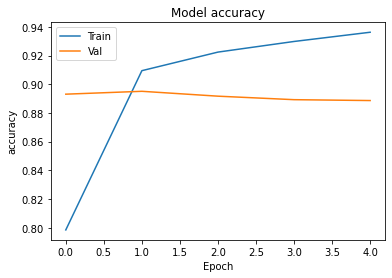

In [22]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Дійсно, з графіку видно, що після другої епохи виникає перенавчання. Callback спрацював коректно.

### <center>Класифікація текстів мережею GRU

Робота з мережами GRU є повністю аналогічною роботі з LSTM, оскільки GRU по суті є спрощеною версією LSTM. Рекурентні модулі в прошарках GRU називаються юнітами. Практично всі параметри прошарків GRU є ідентичними до параметрів LSTM.

- [Повний опис прошарків GRU в Keras](https://keras.io/api/layers/recurrent_layers/gru/)

Створимо мережу GRU для класифікації новин за темами. Архітектура цієї мережі буде повністю аналогічною до попередньо розглянутої LSTM. Лише замінимо прошарок LSTM на прошарок GRU.

In [23]:
model_gru = Sequential()

model_gru.add(Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(GRU(16))
model_gru.add(Dense(4, activation='softmax'))

Компілюємо модель.

In [24]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [25]:
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
gru (GRU)                    (None, 16)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


Створюємо callback для збереження нейронної мережі на кожній епосі, якщо якість роботи на валідаційному наборі даних покращилась. Найкраща мережа зберігається до файлу *best_model_gru.h5*.

In [26]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Навчаємо модель.

In [27]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
800/808 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7994
Epoch 00001: val_accuracy improved from -inf to 0.88750, saving model to best_model_gru.h5
808/808 [==============================] - 5s 7ms/step - loss: 0.5535 - accuracy: 0.8002 - val_loss: 0.3372 - val_accuracy: 0.8875
Epoch 2/5
808/808 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.9059
Epoch 00002: val_accuracy improved from 0.88750 to 0.89281, saving model to best_model_gru.h5
808/808 [==============================] - 5s 6ms/step - loss: 0.2903 - accuracy: 0.9059 - val_loss: 0.3204 - val_accuracy: 0.8928
Epoch 3/5
801/808 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.9201
Epoch 00003: val_accuracy improved from 0.89281 to 0.89394, saving model to best_model_gru.h5
808/808 [==============================] - 5s 6ms/step - loss: 0.2473 - accuracy: 0.9201 - val_loss: 0.3163 - val_accuracy: 0.8939
Epoch 4/5
801/808 [========================

Найкраща модель була отримана на третій епосі.

Переглянемо графік навчання.

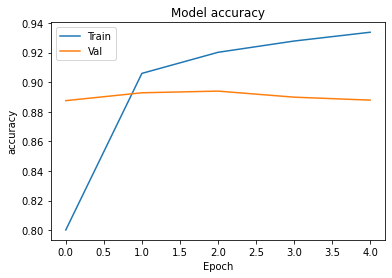

In [29]:
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

З графіку видно, що після третьої епохи виникає перенавчання.

### <center>Оцінка результативності мереж LSTM та GRU на тестових даних

Проведемо оцінку якості роботи обох навчених мереж на тестовій множині. Для цього спочатку перетворимо тестові дані у формат частотного подання слів.

In [30]:
test_sequences = tokenizer.texts_to_sequences(news_test)

Вирівняємо довжини векторів у тестовому наборі даних.

In [31]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

Переглянемо перші 5 записів із тестового набору даних.

In [32]:
x_test[:5]

array([[  14,  913,   12,   14,    4, 3020, 3913,    5,   21,   61,    6,
          14, 5958,   15,    1,  885,    4, 1318, 1365,  512,  164,  451,
        1755,   19,    3,   30,  154,  215, 2847,  105],
       [   1, 8048,   19,   27,  178,    3,    5, 9245,    6,   90,  549,
           2, 5703,  145, 1092,   12, 2509,    4, 3799,  105,  304,   17,
           2,   12,    1,  176,  515,  517,    5,  799],
       [  57,   10, 7398, 2339,    7,   49,    6,  389, 9851, 3924,  283,
         815,  267,   28,  129,   17,   14, 1143,   74, 3708,  811,  674,
           4,    1, 2712,  915,  149,  326,    4,  269],
       [  13,   31,   21,  478,   58,  103,    1, 2157,  596,   17,   36,
        4538, 1437, 1327,   11,  602, 4691,   20,   70, 2572,  478,   12,
        2961, 2149,   36, 4538,   17,    5,    2, 1100],
       [   0,   24,   15,  157,   77,    7,   51,   17,   19,   27, 7093,
           1,  417,    7,   14,  117, 1326,  160,   18,  405,  145,  404,
         146, 7159,    1,  417, 

Проведемо оцінку якості роботи мережі LSTM на тестовій множині. Для цього завантажимо ваги найкращої моделі.

In [33]:
model_lstm.load_weights(model_lstm_save_path)

Тестуємо.

In [34]:
model_lstm.evaluate(x_test, y_test, verbose=1)

399/399 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.8978


[0.3140435516834259, 0.8978056311607361]

Виконаємо аналогічну перевірку для мережі GRU.

In [35]:
model_gru.load_weights(model_gru_save_path)

In [36]:
model_gru.evaluate(x_test, y_test, verbose=1)

399/399 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8976


[0.3135139048099518, 0.8976489305496216]

На основі отриманих результатів робимо висновок, що якість обох моделей є практично однаковою. Обидві мережі показали долю правильних відповідей на тестовій множині на рівні  близько 89,8%.

### <center>Перевірка роботи мереж на власних даних

Застосуємо навчені мережі для класифікації довільного тексту. Для прикладу візьмемо перші два речення з [новини про чіпування котів](https://www.bbc.com/news/science-environment-57068182).

In [98]:
my_news = ["Microchipping pet cats will become compulsory under a wide-ranging new animal welfare plan.\
Environment Secretary George Eustice told the BBC the policy would be monitored by vets \
and enforced in the same way as it is for dogs, which he said has led to over 90% compliance."]

In [99]:
my_news

['Microchipping pet cats will become compulsory under a wide-ranging new animal welfare plan.Environment Secretary George Eustice told the BBC the policy would be monitored by vets and enforced in the same way as it is for dogs, which he said has led to over 90% compliance.']

Перетворимо текст новини до частотного подання. Зверніть увагу, що має використовуватись той самий токенізатор, що і для навчальних даних.

In [106]:
my_sequence = tokenizer.texts_to_sequences(my_news)

In [107]:
my_sequence

[[9964,
  7748,
  26,
  549,
  204,
  2,
  1206,
  3755,
  21,
  4699,
  8453,
  292,
  2511,
  562,
  734,
  491,
  1,
  2649,
  1,
  890,
  81,
  30,
  18,
  6,
  5,
  1,
  600,
  245,
  13,
  19,
  16,
  8,
  5597,
  84,
  41,
  17,
  20,
  395,
  3,
  35,
  1995,
  6534]]

Вирівняємо довжину отриманого вектора.

In [102]:
x_my = pad_sequences(my_sequence, maxlen=max_news_len)

Запишемо назви класів.

In [103]:
class_names = ['Світ', 'Спорт', 'Бізнес', 'Технології']

Використаємо мережу LSTM для класифікації даного тексту.

In [108]:
prediction_lstm = model_lstm.predict(x_my)
score_lstm = np.max(prediction_lstm)
prediction_lstm = np.argmax(prediction_lstm)

In [110]:
print(f'Категорія новини: {class_names[prediction_lstm]} \nДостовірність {score_lstm*100:.2f} %')

Категорія новини: Технології 
Достовірність 77.81 %


Аналогічно застосуємо мережу GRU.

In [111]:
prediction_gru = model_gru.predict(x_my)
score_gru = np.max(prediction_gru)
prediction_gru = np.argmax(prediction_gru)

In [112]:
print(f'Категорія новини: {class_names[prediction_gru]} \nДостовірність {score_gru*100:.2f} %')

Категорія новини: Світ 
Достовірність 73.93 %


Як бачимо, на практиці мережа GRU гірше впоралась із класифікацією, адже насправді новина належить до категорії "Технології". Водночас, текст новини є мультикласовим, тобто її можна віднести до декількох категорій. І категорія "Світ" також є прийнятною для даної новини.